Pronóstico con regresión usando StatModels
===

* 34:29 min | Ultima modificación: Marzo 21, 2021 | YouTube

In [1]:
import warnings

warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

## Introducción

El pronóstico se basa principalmente en los datos historicos de la serie, teniendo como suposición principal que este comportamiento pasado se puede repetir en el futuro.Existen cuatro patrones o componentes básicos en el estudio de las series de tiempo.

**1. Componente de tendencia ${(T_t)}$**: La tendencia es una evolución lenta y a largo plazo de la serie, caracterizado por un crecimiento o decrecimiento de los valores de esta.


**2. Componente estacional ${(S_t)}$ **: La estacionalidad de una serie de tiempo es un patrón que se repite en periodos conocidos, normalmente en una base anual. Este comportamiento se debe principalmente a factores como el clima, días de vacaciones, consumos, estaciones,etc.

**3. Componente cíclico ${(C_t)}$** La componente cíclica se refleja en cambios o movimientos de los datos y generalmente estas fluctuaciones duran 2 años o mas. Este comportamiento se asocia normalmente a fluctuaciones economicas de largo plazo.

La diferencia de la componente estacional y cíclica en series de tiempo que la estacionalidad tiene una longitud constante y se repite sobre una base periodíca, mientras que los ciclos cambian en tanto el longitud como en magnitud.

**4. Componente aleatorio (Error) ${(E_t)}$**: El componente de error de una serie de tiempo está asociado con variaciones aleatorias sin ningún patrón o comportamiento definido alrededor de una media. Normalmente esta componente se debe a eventos extremos *(outliers)* en la serie de tiempo.

# Modelo de regresión lineal simple

<p>El modelo matemático de una regresión lineal simple es expresado como:</p> 
<center>
$$ Y = {\beta_0 + \beta_1 {X}_1 + \epsilon} $$
</div></center>


<p>Donde:</p>

* <p>${Y}$: Variable dependendiente o variable respuesta</p>

* <p>${X}_1$: Variable independiente o explicatoria</p>

* <p>$ \beta_0$: Intercepto de la recta de regresión  </p>

* <p>$\beta_1$: Parametro o coeficiente de regresión</p>

* <p>$\epsilon$: Error aleatorio</p>

Los supuestos del modelo:

<p>${B}_1$ ~ $N(\mu_1,{\sigma_1}^2)$ </p>

<p>${B}_0$ ~ $N(\mu_0,{\sigma_0}^2)$ </p>


Y en cuanto al error :

1. <p>${E(\epsilon)}$: 0</p>

2. <p>${Var(\epsilon)}$: ${σ^2}$ </p>

3.  <p> Se supone que su distribución es normal, $\epsilon$ ~ ${N(0,σ^2)}$</p>

## Modelo de tendencia lineal

El modelo de regresión lineal simple para estimar la tendencia lineal es:

$$ T_t = \beta_0 + \beta_1 {t} + \epsilon_t $$

### Generación de series sintéticas

**Ejercicio.---** Grafique una realización del modelo $y_t = 10 + 0.7*t + e_t$ con $T$ = 100 y $e_t$ ~ $N(0, 0.1^2)$.

### Pronóstico

**Ejercicio.---** Si la serie del ejercicio anterior es la serie real, grafique el pronóstico para las siguientes 20 observaciones y los intervalos de confianza para una desviación estándar.

### Estimación

El modelo matemático de tendencia lineal se define como:

$$y_t = \beta_0 + \beta_1 * t + e_t$$

con:


* $\beta_0$ ~ $N(0, \sigma_0^2)$ 


* $\beta_1$ ~ $N(\mu_1, \sigma_1^2)$ 


* $e_t$ ~ $N(0, \sigma_e^2)$


Y se estima por mínimos cuadrados ordinarios (¿recuerda la formulación matemática?).

In [2]:
#
# datos
#
yt_real = [
    51.74, 48.92, 52.12, 51.90, 50.88, 52.52, 52.50, 55.05, 56.73, 55.05, 56.85, 55.29,
    55.70, 56.72, 56.56, 57.85, 58.67, 59.59, 57.61, 60.15, 60.97, 61.47, 61.94, 63.00,
    60.80, 62.67, 66.14, 64.40, 64.04, 64.15, 65.41, 65.47, 66.25, 67.86, 65.97, 67.52,
    69.25, 67.81, 69.53, 71.16, 71.13, 70.24, 71.51, 71.32, 71.34, 72.52, 73.14, 73.33,
    75.21, 74.07  
]

In [3]:
#
# Construcción de la tendencia lineal
#
t = np.array(range(len(yt_real)))
x = t.reshape((len(yt_real), 1))
x = sm.add_constant(x)

model = sm.OLS(yt_real, x)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2554.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.78e-43
Time:                        21:38:18   Log-Likelihood:                -69.842
No. Observations:                  50   AIC:                             143.7
Df Residuals:                      48   BIC:                             147.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5266      0.278    181.632      0.0

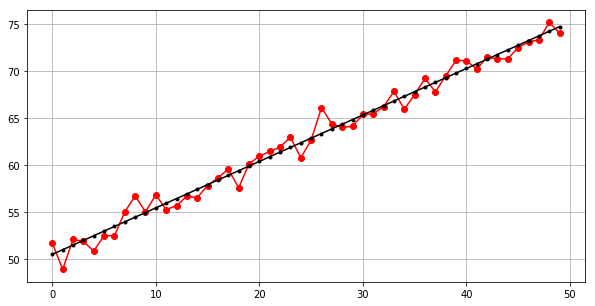

In [4]:
def forecast_plot(yt_real, fitted_model):
    plt.figure(figsize=(10, 5))
    plt.plot(yt_real, 'o-r')
    plt.plot(fitted_model.fittedvalues, '.-k')
    plt.grid()
    plt.show()
    
forecast_plot(yt_real, fitted_model)

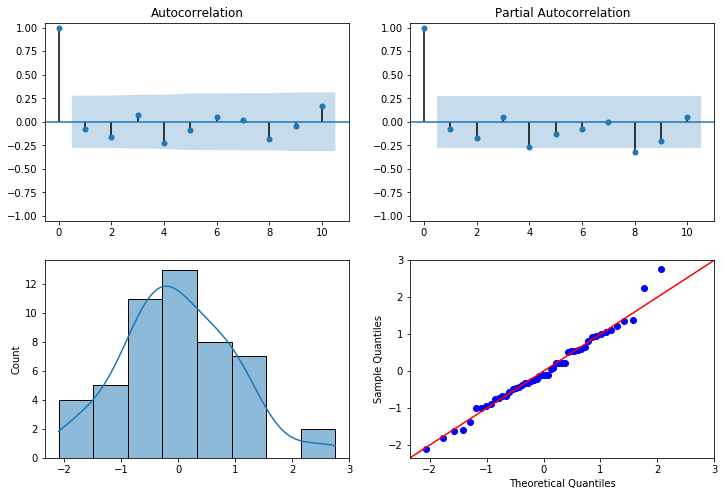

In [5]:
def diag_plot(fitted_model):

    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(fitted_model.resid, lags=10, ax=ax1)
    plt.gca().set_ylim(-1.05, 1.05)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(fitted_model.resid, lags=10, ax=ax2)
    plt.gca().set_ylim(-1.05, 1.05)
    ax3 = fig.add_subplot(223)
    sns.histplot(fitted_model.resid, kde=True)
    ax4 = fig.add_subplot(224)
    sm.qqplot(fitted_model.resid, line ='45', ax=ax4);
    
diag_plot(fitted_model)

**Ejercicio.--** Pronostique los siguientes 20 valores de la serie y grafique los intervalos de confianza.

## Modelo de regresión lineal multiple

<p>Este modelo es una extensión del modelo lineal simple, por lo cual se sigue teniendo los supuestos inicialmente planteados. El modelo matemático de la regresión lineal multiple puede ser expresado como:</p> 
<center>
$$ Y = {{B}_0 + {B}_1 {X}_1 + {B}_2 {X}_2 +..+ {B}_k {X}_k + {e}} $$
</div></center>



# Modelo de tendencia cuadrática

El modelo de regresión multiple para estimar la tendencia cuadrática de una serie es:

$$ T_t = \beta_0 + \beta_1 {t} + \beta_2 {t}^2 + \epsilon_t $$

### Generación de series sintéticas

**Ejercicio.--** Grafique una realización del modelo $y_t = 10 + 0.8*t + 0.05 * t^2 + e_t$ con $T$ = 100 y $e_t$ ~ $N(0, 0.1^2)$.

### Pronóstico

**Ejercicio.--** Si la serie del ejercicio anterior es la serie real, grafique el pronóstico para las siguientes 20 observaciones y los intervalos de confianza para una desviación estándar.

### Estimación

El modelo de regresión multiple para estimar la tendencia cuadrática de una serie es:

$$ y_t = \beta_0 + \beta_1 {t} + \beta_2 {t}^2 + e_t $$

In [6]:
yt_real = [
     23.47,  25.32,  19.66,  26.91,  19.08,  22.88,  35.49,  23.33,  25.26,  27.22,  32.99,  36.45,
     35.20,  39.99,  45.94,  47.29,  47.34,  46.39,  50.79,  53.07,  55.61,  59.22,  65.38,  63.58,
     69.53,  78.23,  78.52,  82.44,  90.66,  82.86,  93.54,  94.05, 101.24,  97.06, 119.74, 119.75,
    118.28, 116.69, 126.91, 132.68, 137.10, 151.43, 151.47, 146.06, 154.55, 156.77, 164.12, 176.14,
    171.41, 192.8
]

In [7]:
#
# Construcción de la tendencia lineal
#
t = np.array(range(len(yt_real)))
x = np.column_stack((t, t ** 2))
x = sm.add_constant(x)

model = sm.OLS(yt_real, x)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2929.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           4.69e-50
Time:                        21:38:18   Log-Likelihood:                -145.61
No. Observations:                  50   AIC:                             297.2
Df Residuals:                      47   BIC:                             303.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6821      1.872     10.511      0.0

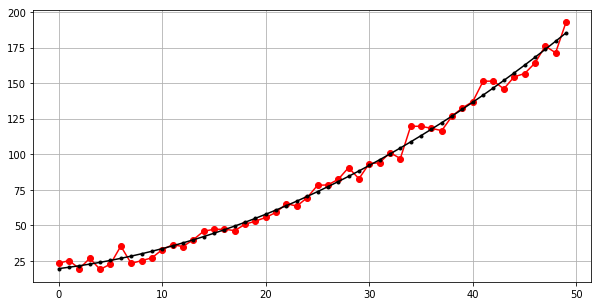

In [8]:
# Pronostico
forecast_plot(yt_real, fitted_model)

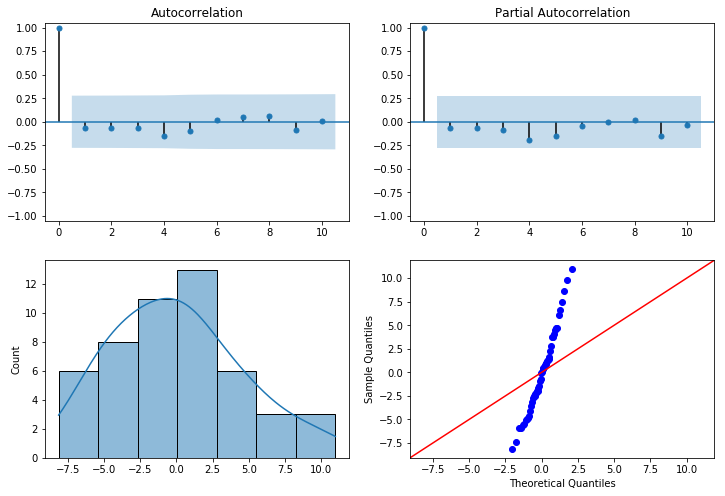

In [9]:
diag_plot(fitted_model)

**Ejercicio.--** Pronostique los siguientes 20 valores de la serie y grafique los intervalos de confianza.

**Ejercicio.--**. Realice un modelo lineal , un modelo cuadrático y un modelo cúbico para ajustar la tendencia de la siguiente serie. 

* Haga el diagnóstico completo de cada modelo.

* ¿Cuál es el mejor?

In [10]:
yt_real = [
    152.50, 212.01,  70.63,  58.90,
    134.84, 163.58, 105.02,  42.40,
    109.16, 173.84,  86.63,  64.35,
    185.66, 153.66, 133.03,  56.12,
    151.76, 205.41, 121.47,  96.01,
    171.70, 184.69, 120.68, 112.08,
    175.09, 235.06, 128.85, 123.47,
    180.03, 154.95, 134.25, 129.45,
    229.37, 238.49, 204.75, 206.34,
    243.25, 292.75, 223.15, 190.72,
    338.10, 312.32, 284.76, 248.44,
    331.62, 374.42, 331.07, 305.67,
]

## Modelo de regresión multiple para componente de tendencia y estacionalidad.

Para modelar la componente estacional $S_t$ debe:

1. Identificar el periodo de la serie de tiempo $y_t$

2.  Generar las variables indicadoras $I_{j} (t)$, para $t=1,..S$, que indica al modelo de ajuste en que periodo de tiempo se encuentra mediante {0,1}.

3. Estimar los parametros del modelo.

Por tanto el modelo de regresión completo queda como:

$$Y_t = T_t + S_t = \beta_0 + \sum_{j=1}^{k} \beta_j {t^j} + \sum_{j=1}^{s-1} \delta_j I_j {t} + \epsilon_T $$


### Generación de series sintéticas

**Ejercicio.--** Grafique una realización del modelo 
$y_t = 10 + 0.8*t + 0.05 * t^2 + 1.5 * I_{1, t} + 1.0 * I_{2, t} + 0.3 * I_{3, t} + e_t$ 
con:


* $T$ = 40 


* $e_t$ ~ $N(0, 0.1^2)$.


* $I_{1, t}$ = 1, 0, 0, 0, 1, 0, 0, 0, 1, 0...


* $I_{2, t}$ = 0, 1, 0, 0, 0, 1, 0, 0, 0, 1...


* $I_{3, t}$ = 0, 0, 1, 0, 0, 0, 1, 0, 0, 0...

### Pronóstico

**Ejercicio.--** Si la serie del ejercicio anterior es la serie real, grafique el pronóstico para las siguientes 20 observaciones y los intervalos de confianza para una desviación estándar.

### Estimación

El siguiente modelo matemático es estimado por mínimos cuadrados ordinarios, al igual que en los casos anteriores:

$$y_t =  \beta_0 + \sum_{j=1}^{k} \beta_j * t^j + \sum_{j=1}^{s-1} \delta_j * I_t + e_t $$

Como paso adicional se deben generar las variables indicadoras $I_{s, t}$ con $S=1, ..., S-1$ donde $S$ es el período de la componente cíclica del modelo.

In [11]:
# Esta serie es trimestral
yt_real = [
    12.82, 13.03, 11.58, 11.77, 
    12.84, 13.07, 12.36, 12.14,
    12.96, 13.63, 12.83, 12.16,
    13.98, 13.88, 13.14, 13.27,
    13.90, 14.24, 13.46, 13.25,
    14.54, 14.45, 14.08, 13.83
]

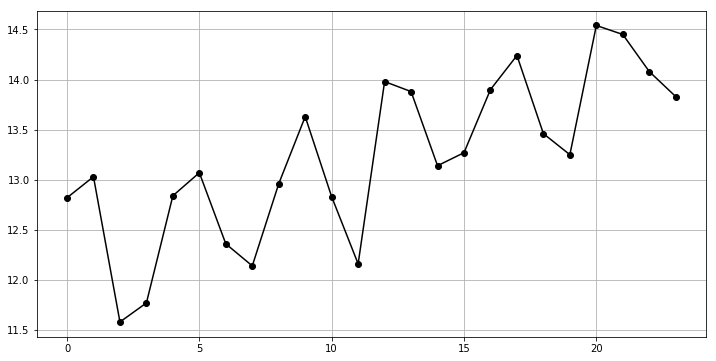

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(yt_real, 'o-k')
plt.grid()
plt.show()

In [13]:
# Longitud de la serie de tiempo
T = len(yt_real)

# Tendencia lineal
t = list(range(T))

# Variabes dummy 
q1 = [0 if t % 4 else 1 for t in range(T)]
q2 = [0 if (t - 1) % 4 else 1 for t in range(T)]
q3 = [0 if (t - 2) % 4 else 1 for t in range(T)]

q1, q2, q3

([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [14]:
#
# Construcción de la tendencia lineal
#
x = np.column_stack((t, q1, q2, q3))
x = sm.add_constant(x)

#
# Particion en entrenamiento y prueba
#
x_train = x[:25,:]
yt_train_real = yt_real[:25]

#
# Estimación del modelo
#
model = sm.OLS(yt_train_real, x_train)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     72.59
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           3.06e-11
Time:                        21:38:19   Log-Likelihood:                 4.6553
No. Observations:                  24   AIC:                            0.6893
Df Residuals:                      19   BIC:                             6.580
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4713      0.126     90.876      0.0

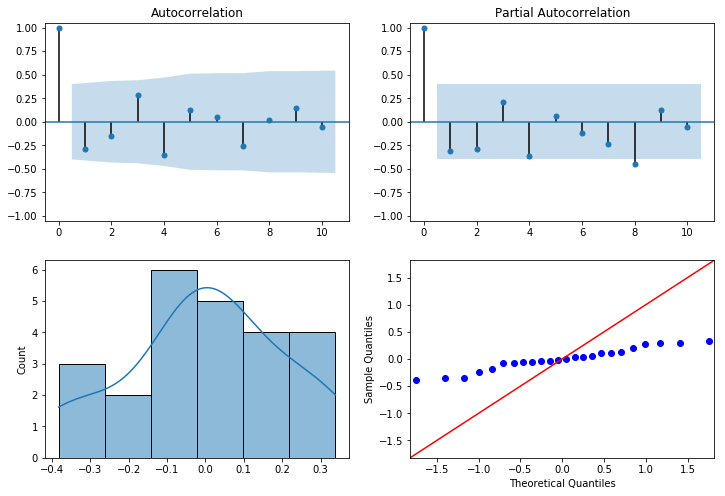

In [15]:
#
# Diagnostico
#
diag_plot(fitted_model)

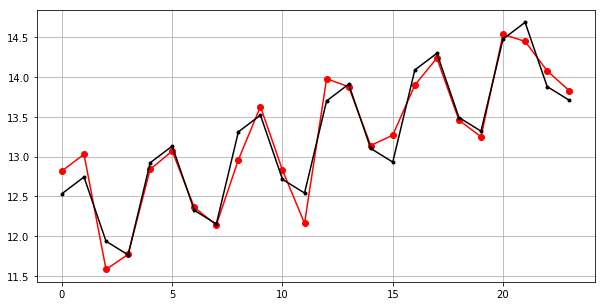

In [16]:
#
# Pronostico
#
yt_pred = fitted_model.predict(x)


def plot_predicted(yt_real, yt_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(yt_real, 'o-r')
    plt.plot(yt_pred, '.-k')
    plt.grid()
    plt.show()
    
plot_predicted(yt_real, yt_pred)

**Ejercicio.--** La componente estacional también puede represntarse como:

$$S_t =\beta * \cos (2\pi f t + \Phi)$$


Para el ejercicio anterior, reemplace las variables dummy por esta componente, estime el modelo y realice el pronóstico.

# Intervenciones --- Cambio de nivel

In [17]:
yt_real = [
    11.60, 16.04, 21.99, 16.29,
    24.50, 18.57, 20.69, 18.46,
    22.41, 23.60, 21.98, 28.47,
    26.74, 25.46, 27.67, 28.80,
    27.20, 31.74, 28.79, 32.87,
    35.91, 33.80, 38.97, 36.69,
    39.39, 69.19, 69.00, 68.20,
    73.84, 77.81, 74.44, 75.23,
    78.39, 77.43, 76.73, 82.60,
    80.22, 83.32, 82.74, 83.58,
    84.81, 85.55, 87.92, 85.47,
    90.26, 89.12, 88.02, 90.12,
    91.54, 88.84 
]

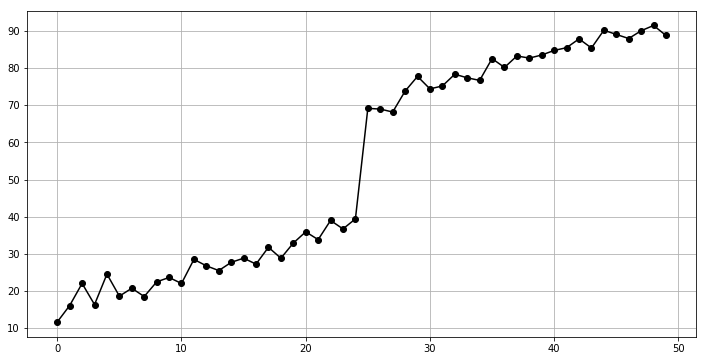

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(yt_real, 'o-k')
plt.grid()
plt.show()

In [19]:
# Longitud de la serie de tiempo
T = len(yt_real)

# Tendencia lineal
t = list(range(T))

# Se introduce una variable dummy que vale 0 
# antes del cambio y 1 a partir del cambio
t0 = 25
dummy = [0 if time < t0 else 1 for time in t]

x = np.column_stack((t, dummy))
x = sm.add_constant(x)

model = sm.OLS(yt_real, x)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4150.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.38e-53
Time:                        21:38:20   Log-Likelihood:                -108.80
No. Observations:                  50   AIC:                             223.6
Df Residuals:                      47   BIC:                             229.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0855      0.679     22.210      0.0

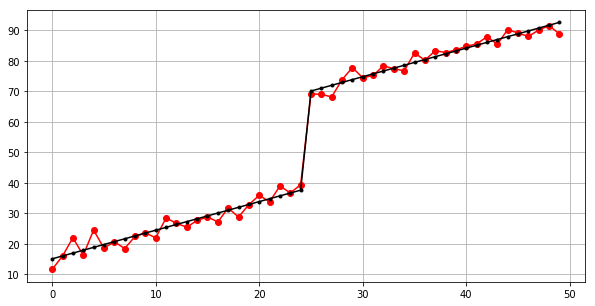

In [20]:
#
# Pronostico
#
forecast_plot(yt_real, fitted_model)

**Pregunta.---** Cómo se busca el punto exacto de un cambio de nivel?

# Intervenciones -- cambio de pendiente

In [21]:
yt_real = [
      3.20,   2.79,   3.43,   5.55,
      6.69,   9.92,   7.45,   9.84,
     10.25,  13.15,  12.86,  14.80,
     17.48,  15.04,  17.01,  18.65,
     19.27,  19.45,  19.62,  20.91,
     23.82,  22.86,  24.63,  24.16,
     29.40,  34.67,  37.95,  38.31,
     48.16,  53.54,  53.70,  57.28,
     66.94,  63.06,  69.10,  72.28,
     80.93,  84.76,  88.22,  89.48,
     98.22,  99.90, 103.34, 110.44,
    108.02, 110.50, 115.34, 117.55,
    125.79, 127.41    
]

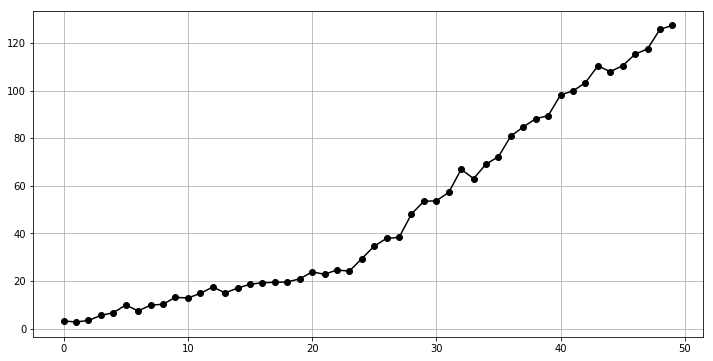

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(yt_real, 'o-k')
plt.grid()
plt.show()

In [23]:
# Longitud de la serie de tiempo
T = len(yt_real)

# Tendencia lineal
t = list(range(T))

# Se introduce una variable dummy que vale 0 
# antes del cambio de pendinete y luego vale 
# 1, 2, 3, ...
t0 = 25
dummy = [0] * (t0 - 2) + list(range(T - t0 + 2))

x = np.column_stack((t, dummy))
x = sm.add_constant(x)

model = sm.OLS(yt_real, x)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8695.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           4.16e-61
Time:                        21:38:20   Log-Likelihood:                -106.88
No. Observations:                  50   AIC:                             219.8
Df Residuals:                      47   BIC:                             225.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6228      0.791      3.314      0.0

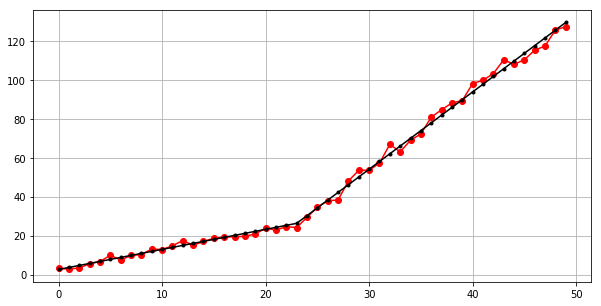

In [24]:
#
# Pronostico
#
forecast_plot(yt_real, fitted_model)

# Intervenciones -- datos atípicos (outliers)

In [25]:
yt_real = [
    17.60, 19.16, 21.21, 21.67,
    21.79, 22.59, 23.52, 20.00,
    23.37, 28.46, 29.89, 27.80,
    28.34, 25.85, 26.98, 29.90,
    91.40, 30.13, 35.28, 35.01,
    33.57, 35.71, 39.49, 37.16,
    38.32, 40.10, 41.66, 43.71,
    44.17, 44.29, 45.09, 46.02,
    42.50, 45.87, 50.96, 52.39,
    50.30, 50.84, 48.35, 49.48,
    52.40, 54.19, 52.63, 57.78,
    57.51, 56.07, 58.21, 61.99,
    59.66, 60.82
]

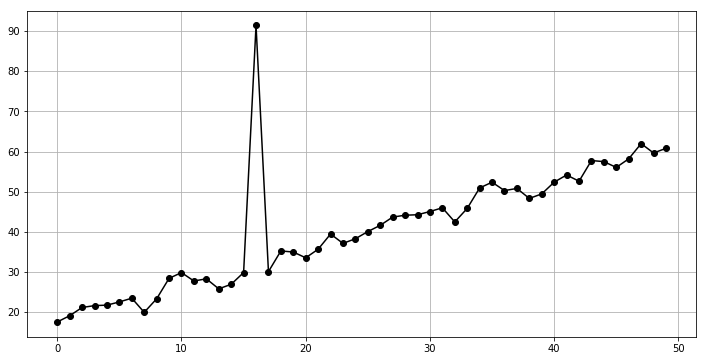

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(yt_real, 'o-k')
plt.grid()
plt.show()

In [27]:
# Longitud de la serie de tiempo
T = len(yt_real)

# Tendencia lineal
t = list(range(T))

# Se introduce una variable dummy que vale 1 
# en el outlier y 0 en caso contrario

t0 = 25
dummy = [0] * T
dummy[t0] = 1

x = np.column_stack((t, dummy))
x = sm.add_constant(x)

model = sm.OLS(yt_real, x)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     47.31
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           5.53e-12
Time:                        21:38:21   Log-Likelihood:                -177.94
No. Observations:                  50   AIC:                             361.9
Df Residuals:                      47   BIC:                             367.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1719      2.448      8.240      0.0

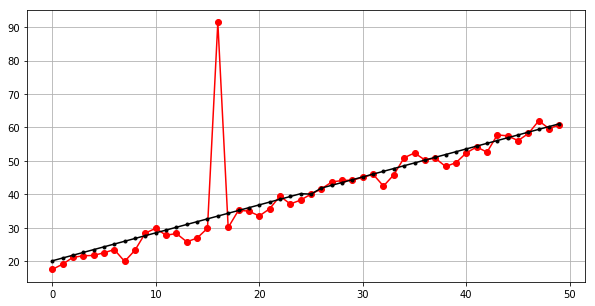

In [28]:
#
# Pronostico
#
forecast_plot(yt_real, fitted_model)

**Ejercicio.---** Determine que tipo de intervención presenta la siguiente serie de tiempo y ajuste un modelo de regresión.

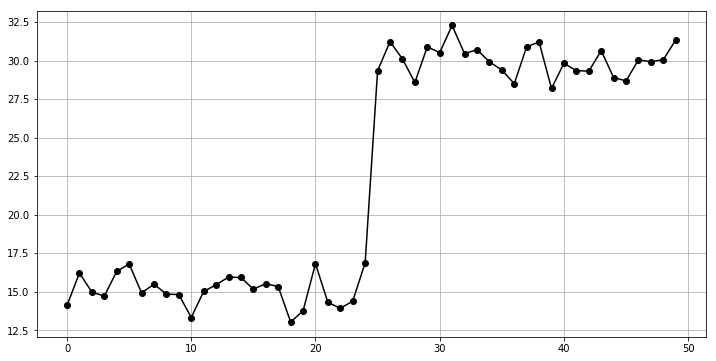

In [29]:
yt_real = [
    14.12, 16.23, 14.99, 14.73,
    16.33, 16.82, 14.94, 15.50,
    14.86, 14.83, 13.34, 15.03,
    15.47, 15.96, 15.94, 15.18,
    15.54, 15.35, 13.05, 13.77,
    16.83, 14.32, 13.94, 14.40,
    16.90, 29.36, 31.25, 30.13,
    28.60, 30.91, 30.54, 32.30,
    30.47, 30.73, 29.94, 29.41,
    28.52, 30.92, 31.22, 28.21,
    29.84, 29.37, 29.33, 30.66,
    28.92, 28.70, 30.07, 29.94,
    30.08, 31.36
]

plt.figure(figsize=(12, 6))
plt.plot(yt_real, 'o-k')
plt.grid()
plt.show()